In [273]:
# Get thinkdsp.py
import os
import numpy

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py", "thinkdsp.py")

from thinkdsp import decorate, Sinusoid, normalize, unbias, SquareSignal, \
    TriangleSignal, SinSignal, Chirp, read_wave

### Упражнение 3.1
Изменение окна Хэмминга на любое другое

In [274]:
signal = SinSignal(freq=440)
wave = signal.make_wave(signal.period * 30.25)

Спектр с утечками (без оконных функций)

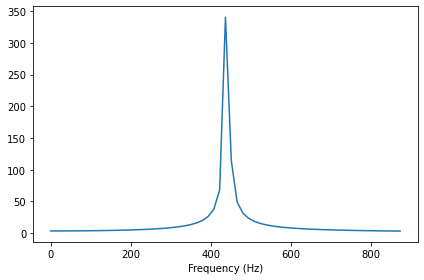

In [275]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Спектр, построенный с помощью окна Хэмминга

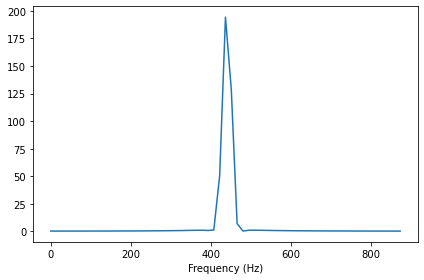

In [276]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Спектр, построенный с помощью окна bartlett

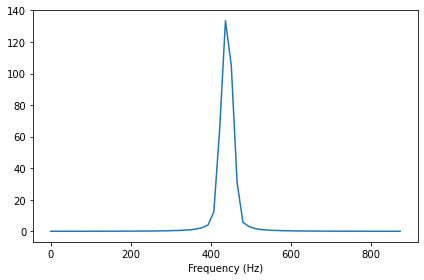

In [277]:
wave.window(numpy.bartlett(len(wave)))
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Спектр, построенный с помощью окна blackman

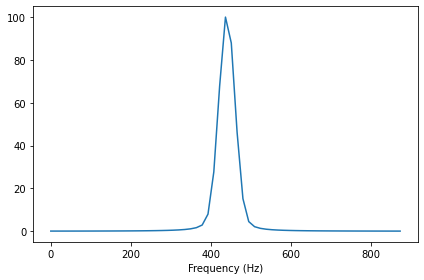

In [278]:
wave.window(numpy.blackman(len(wave)))
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

### Упражнение 3.2
Создание класса `SawtoothChirp`.

Класс `SawtoothChirp`

In [279]:
PI2 = numpy.pi * 2

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = numpy.linspace(self.start, self.end, len(ts))
        dts = numpy.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = numpy.cumsum(dphis)
        cycles = phases / PI2
        # From SawtoothSignal
        frac, _ = numpy.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Проверка работы класса, прослушивание созданного сигнала

In [280]:
sawtooth_signal = SawtoothChirp(start=900, end=350)
sawtooth_wave = sawtooth_signal.make_wave(duration=1, framerate=4000)
sawtooth_wave.apodize()
sawtooth_wave.make_audio()

Спектрограмма

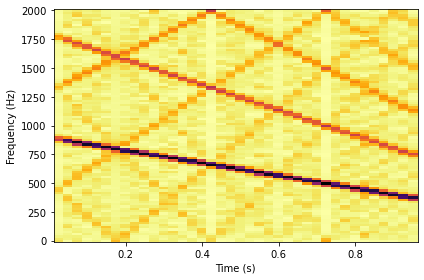

In [281]:
spectrogram = sawtooth_wave.make_spectrogram(200)
spectrogram.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')


### Упражнение 3.3
Работа с `SawtoothChirp`

In [282]:
sawtooth_signal = SawtoothChirp(start=2500, end=3000)
sawtooth_wave = sawtooth_signal.make_wave(duration=1, framerate=20000)
sawtooth_wave.make_audio()


Получение спектра

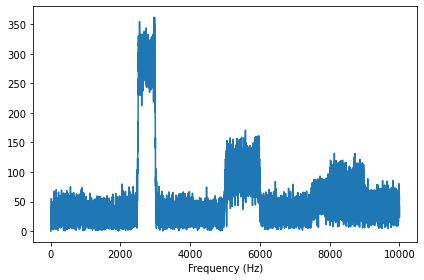

In [283]:
sawtooth_wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

### Упражнение 3.4
Глиссандо

Считывание файла

In [284]:
wave = read_wave('resources/Sounds/task4_violin_glissando.wav')
wave.make_audio()

Выбор сегмента

In [285]:
segment = wave.segment(start=0.17, duration=1)
segment.make_audio()

Получение спектрограммы

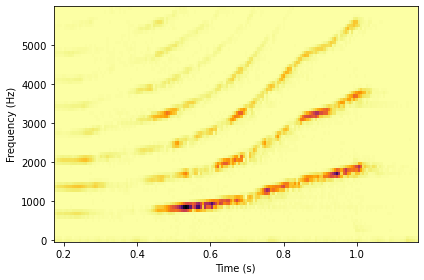

In [286]:
segment.make_spectrogram(512).plot(high=6000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

### Упражнение 3.5
Создание класса `TromboneGliss`

Класс

In [287]:
class TromboneGliss(Chirp):
     def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = numpy.linspace(l1, l2, len(ts))
        freqs = 1 / lengths

        dts = numpy.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = numpy.cumsum(dphis)
        ys = self.amp * numpy.cos(phases)
        return ys

Создание сигнала, который идёт вверх

In [288]:
signal_up = TromboneGliss(262, 349)
wave_up = signal_up.make_wave(duration=1)
wave_up.make_audio()

Создание сигнала, который идёт вниз

In [289]:
signal_down = TromboneGliss(349, 262)
wave_down = signal_down.make_wave(duration=1)
wave_down.make_audio()

Итоговый сигнал и его спектрограмма

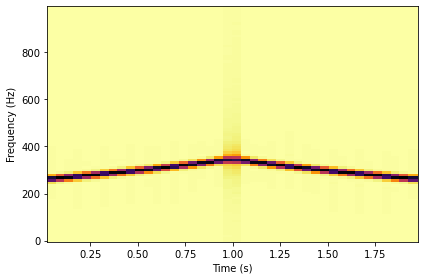

In [290]:
wave_up_down = wave_up | wave_down
spectrogram = wave_up_down.make_spectrogram(1024)
spectrogram.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')
wave_up_down.make_audio()

### Упражнение 3.6
Определение гласных звуков

Считывание файла, прослушивание и получение спектрограммы

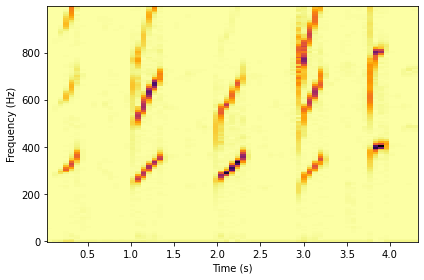

In [291]:
w = read_wave('resources/Sounds/task6_vowels.wav')
wave = w.segment(start=0, duration=4.4)

wave.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')
wave.make_audio()

Получение спектра звука "А"

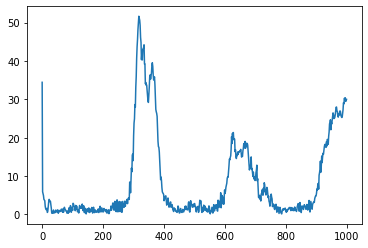

In [292]:
segment_a = wave.segment(start=0.25, duration=0.7)
segment_a.make_spectrum().plot(high=1000)
segment_a.make_audio()

Получение спектра звука "Э"

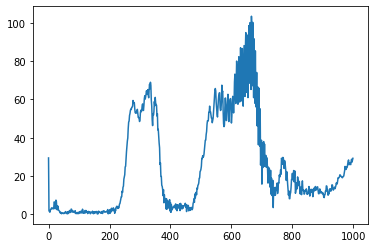

In [293]:
segment_e = wave.segment(start=0.85, duration=0.7)
segment_e.make_spectrum().plot(high=1000)
segment_e.make_audio()

Получение спектра звука "И"

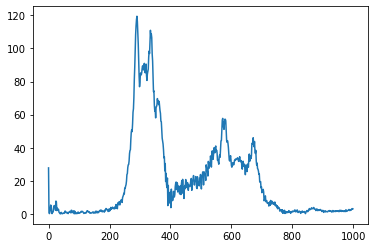

In [294]:
segment_i = wave.segment(start=1.8, duration=0.7)
segment_i.make_spectrum().plot(high=1000)
segment_i.make_audio()

Получение спектра звука "О"

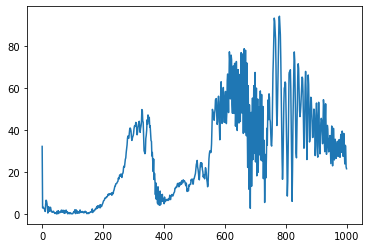

In [295]:
segment_o = wave.segment(start=2.6, duration=0.7)
segment_o.make_spectrum().plot(high=1000)
segment_o.make_audio()

Получение спектра звука "У"

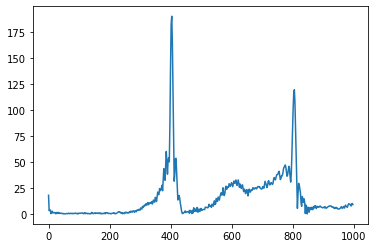

In [296]:
segment_u = wave.segment(start=3.7, duration=0.5)
segment_u.make_spectrum().plot(high=1000)
segment_u.make_audio()